In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import pickle
import tensorflow as tf
import numpy as np
with open('./expert_data/Ant-v2.pkl', 'rb') as f:
    trace = pickle.load(f)

In [16]:
from behavioral_cloning import *
from load_policy import load_policy

# DAGGER

obs (1, 111) (1, 111)
iter 0
100/1000
200/1000
300/1000
returns [1060.0737947250834]
mean return 1060.0737947250834
std of return 0.0
iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
returns [1060.0737947250834, 3514.202177956515]
mean return 2287.137986340799
std of return 1227.0641916157156
iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
returns [1060.0737947250834, 3514.202177956515, 4441.323920879342]
mean return 3005.1999645203136
std of return 1426.540230503335
iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
returns [1060.0737947250834, 3514.202177956515, 4441.323920879342, 4477.576899667319]
mean return 3373.294198307065
std of return 1390.2312278087222
iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
returns [1060.0737947250834, 3514.202177956515, 4441.323920879342, 4477.576899667319

<IPython.core.display.Javascript object>


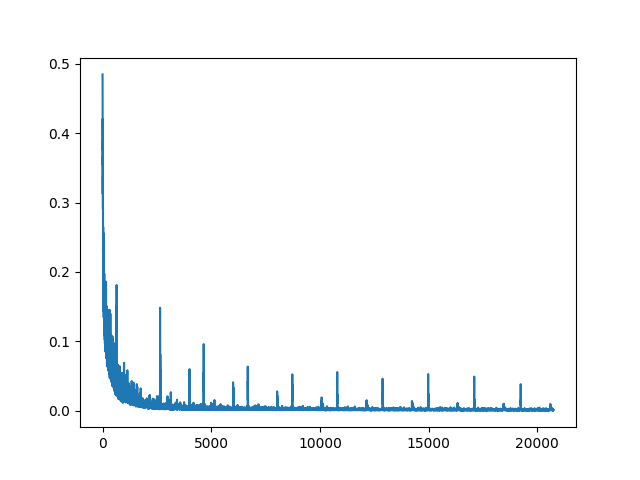

In [30]:
batch_size = 50

obs_dim = list(trace['observations'].shape[1:])
action_dim = list(trace['actions'].shape[2:])
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

tf.reset_default_graph()
losses = []

it_dagger = 10
#ax = f.subplot(111)
with tf.Session() as sess:
    dataset = get_dataset('./expert_data/Ant-v2.pkl')
    dataset = dataset.map(lambda x, y: (tf.cast(x,tf.float32),y))
    #print(data)
    expert_policy = load_policy('./experts/Ant-v2.pkl')
    batched_dataset = dataset.batch(batch_size)
    iterator = batched_dataset.make_one_shot_iterator()
    next_element = iterator.get_next()
    behavioral_net = BehavioralCloningNet(obs_dim, action_dim, batch_size)
    losses = []
    returns = []
    evaluate = EvaluateDagger('Ant-v2',expert_policy,behavioral_net,render=False)
    for i in range(it_dagger):
        losses += behavioral_net.train(next_element)
        evaluate.expert_obs = []
        evaluate.expert_actions = []
        #def eval_fun(obs):
        #    expert_obs += obs
        #    for o in obs:
        #        expert_actions.append(policy_fn(obs[None,:]))
        #    return behavioral_net.predict([obs])
        #evaluate.step = eval_fun
        returns += evaluate.evaluate()
        np.cast
        expert_obs_arr = np.asarray(evaluate.expert_obs,dtype=np.float32)
        expert_actions_arr = np.asarray(evaluate.expert_actions,dtype=np.float32)
        expert_labeled_new_data = tf.data.Dataset.from_tensor_slices((expert_obs_arr,expert_actions_arr))
        dataset = dataset.concatenate(expert_labeled_new_data)
        batched_dataset = dataset.batch(batch_size)
        iterator = batched_dataset.make_one_shot_iterator()
        next_element = iterator.get_next()
        print('returns', returns)
        print('mean return', np.mean(returns))
        print('std of return', np.std(returns))
    fig = plt.figure()
    plt.plot(losses)
    plt.show()
    


In [19]:
a = [3]
def s():
    print(a)
s()
a = [2]
s()



[3]
[2]
